# 1.Import các thư viện cần thiết

In [178]:
# %pip install pandas
# %pip install scikit-learn
# %pip install numpy
# %pip install matplotlib
# %pip install joblib           

In [179]:


# Import các thư viện cần thiết

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import *
from sklearn.feature_selection import SelectKBest
import matplotlib.pyplot as plt
import joblib


# 2.Import datasheet và tiền xử lý dữ liệu

In [180]:
# Đọc dữ liệu
url = "penguins_size.csv"
data = pd.read_csv(url, delimiter=',')

In [181]:
# Show data
data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [182]:
# Xóa các hàng có giá trị thiếu
data.dropna(inplace=True)

# Ánh xạ giá trị của species sang số nguyên
species_map = {'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}
data['species'] = data['species'].map(species_map)

# Chia dữ liệu thành features và label
X = data[['culmen_length_mm', 'culmen_depth_mm']]
y = data['species']

In [183]:
#Data
X

,culmen_length_mm,culmen_depth_mm
0,39.1,18.7
1,39.5,17.4
2,40.3,18.0
4,36.7,19.3
5,39.3,20.6
...,...,...
338,47.2,13.7
340,46.8,14.3
341,50.4,15.7
342,45.2,14.8


In [184]:
#label
y

0      0
1      0
2      0
4      0
5      0
      ..
338    2
340    2
341    2
342    2
343    2
Name: species, Length: 334, dtype: int64

In [185]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [186]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) # type: ignore



# Chọn tính năng
selector = SelectKBest(k=10)
X_train = selector.fit_transform(X_train, y_train)
X_test = selector.transform(X_test)





c:\Users\Quang-test\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=10 is greater than n_features=2. All the features will be returned.
  warnings.warn(


In [187]:
X_train

array([[ 0.752437  , -0.76559187],
       [ 0.6022236 , -1.2799601 ],
       [-1.23789063, -0.04547633],
       [ 1.61616409,  1.49762838],
       [-1.42565738,  0.36601826],
       [ 0.90265041, -0.50840775],
       [ 0.78999035, -1.2799601 ],
       [-1.36932736,  0.77751285],
       [ 1.33451395,  0.57176555],
       [-1.35055068, -0.09691316],
       [ 0.78999035, -1.38283375],
       [-1.14400725, -0.30266045],
       [ 1.33451395,  1.44619155],
       [ 0.90265041,  1.29188108],
       [ 0.52711689,  0.10883414],
       [-1.06890055,  0.41745508],
       [ 0.30179678, -1.2799601 ],
       [-0.86235711,  0.05739731],
       [-0.13006676,  0.52032873],
       [-1.12523057,  0.52032873],
       [ 0.73366033, -0.35409728],
       [ 0.43323351, -1.38283375],
       [-0.97501717,  0.82894967],
       [-1.01257052,  0.05739731],
       [ 0.56467024, -1.74289152],
       [-2.08284103, -0.50840775],
       [-0.54315362,  1.65193885],
       [-0.26150349,  0.72607602],
       [ 0.28302011,

In [188]:
y_train

292    2
302    2
62     0
181    1
15     0
      ..
194    1
77     0
112    0
277    2
108    0
Name: species, Length: 233, dtype: int64

In [189]:
X_test

array([[-0.88113379, -0.1997868 ],
       [ 0.50834022, -1.2799601 ],
       [-0.39294022,  1.03469696],
       [ 1.05286381,  0.10883414],
       [-0.58070698,  0.57176555],
       [ 0.1328067 , -1.69145469],
       [ 1.2218539 , -1.07421281],
       [ 1.03408714,  0.77751285],
       [ 1.01531046,  0.57176555],
       [ 1.35329063,  0.98326014],
       [-0.24272681,  0.26314461],
       [-1.8011909 ,  2.06343344],
       [ 0.73366033, -1.02277598],
       [-1.38810403,  0.72607602],
       [ 0.17036005, -1.38283375],
       [-1.35055068, -0.30266045],
       [-1.50076409,  0.05739731],
       [ 0.43323351,  0.41745508],
       [-1.40688071,  0.88038649],
       [ 0.28302011, -1.64001787],
       [-0.28028016,  0.62320237],
       [-0.65581368, -0.04547633],
       [ 0.48956354, -0.50840775],
       [ 1.2218539 ,  1.34331791],
       [-0.99379384,  0.36601826],
       [-1.05012387, -0.04547633],
       [ 0.1328067 , -1.94863881],
       [ 1.3720673 , -0.4055341 ],
       [ 2.59255122,

In [190]:
y_test

30     0
317    2
79     0
201    1
63     0
      ..
7      0
215    1
99     0
35     0
27     0
Name: species, Length: 101, dtype: int64

# 3.Huấn luyện mô hình dựa trên Preceptron Learning Algorithm

In [191]:

# Tạo mô hình PLA
perceptron = Perceptron(max_iter=500,
    tol=1e-3,
    eta0=0.1)

# Huấn luyện mô hình PLA
perceptron.fit(X_train, y_train)

Perceptron(eta0=0.1, max_iter=500)

In [192]:
# Lưu mô hình
joblib.dump(perceptron, 'perceptron.pkl')


['perceptron.pkl']

In [193]:
# Dự đoán trên tập kiểm tra
y_pred_pla = joblib.load('perceptron.pkl').predict(X_test)
print("Kết quả dự đoán của mô hình PLA trên tập kiểm tra:")
print("Giá trị thực tế (y_test):", y_test)
print("Kết quả dự đoán (y_pred_pla):", y_pred_pla)
print("Độ chính xác:", accuracy_score(y_test, y_pred_pla))



Kết quả dự đoán của mô hình PLA trên tập kiểm tra:
Giá trị thực tế (y_test): 30     0
317    2
79     0
201    1
63     0
      ..
7      0
215    1
99     0
35     0
27     0
Name: species, Length: 101, dtype: int64
Kết quả dự đoán (y_pred_pla): [0 2 0 1 0 2 2 1 1 1 0 0 2 0 2 0 0 1 0 2 0 0 2 1 0 0 2 2 1 2 1 1 0 0 1 2 1
 2 0 0 0 0 1 1 0 0 2 0 0 2 0 2 2 0 0 2 0 0 1 1 1 2 2 0 0 1 0 2 0 2 0 0 1 2
 2 1 0 0 0 2 0 0 0 0 2 2 0 2 1 1 2 2 0 0 0 0 0 1 0 0 0]
Độ chính xác: 0.9405940594059405


In [194]:
# Đánh giá mô hình PLA
print("PLA Classification Report :")
print(classification_report(y_test, y_pred_pla))

#PLA Classification Report maxiter = 1000 tol 1e-3:
#               precision    recall  f1-score   support

#            0       0.98      1.00      0.99        49
#            1       0.71      0.94      0.81        18
#            2       1.00      0.79      0.89        34

#     accuracy                           0.92       101
#    macro avg       0.90      0.91      0.89       101
# weighted avg       0.94      0.92      0.92       101



PLA Classification Report :
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        49
           1       0.77      0.94      0.85        18
           2       1.00      0.85      0.92        34

    accuracy                           0.94       101
   macro avg       0.92      0.93      0.92       101
weighted avg       0.95      0.94      0.94       101



In [195]:
print("Ma trận nhầm lẫn PLA:", confusion_matrix(y_test, y_pred_pla))

Ma trận nhầm lẫn PLA: [[49  0  0]
 [ 1 17  0]
 [ 0  5 29]]


In [196]:
# Chuyển đổi X_test thành DataFrame pandas
X_test_df = pd.DataFrame(X_test, columns=['culmen_length_mm', 'culmen_depth_mm'])

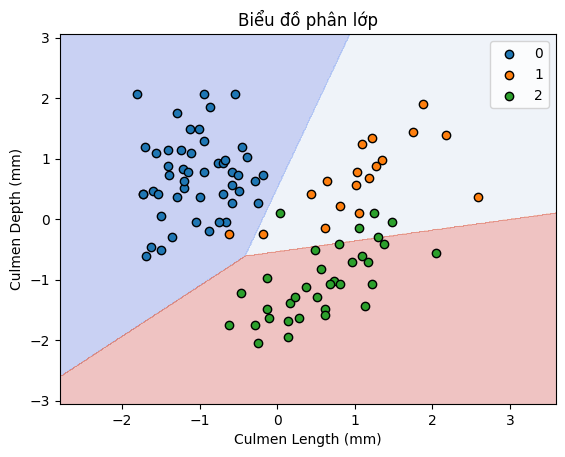

In [197]:
# Vẽ biểu đồ phân lớp
#

# Vẽ biểu đồ phân lớp
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Dự đoán trên lưới
Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Vẽ đường biên quyết định
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# Vẽ các điểm dữ liệu
for i, species in enumerate(np.unique(y_test)):
    mask = y_test == species
    plt.scatter(X_test[mask, 0], X_test[mask, 1], label=species, marker='o', edgecolor='k')

plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')
plt.title('Biểu đồ phân lớp')
plt.legend()
plt.show()

# 4.Huấn luyện mô hình dựa trên ID3



In [198]:
    
# Tạo mô hình ID3
id3 = DecisionTreeClassifier(
    criterion='entropy',       
    random_state=42,             
    class_weight='balanced'      #
)

# Huấn luyện mô hình ID3
id3.fit(X_train, y_train)


DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       random_state=42)

In [199]:
# Lưu mô hình
joblib.dump(id3, 'id3.pkl')




['id3.pkl']

In [200]:
# Dự đoán trên tập kiểm tra
y_pred_id3 = joblib.load('id3.pkl').predict(X_test)
print("Kết quả dự đoán của mô hình ID3 trên tập kiểm tra:")
print("Giá trị thực tế (y_test):", y_test)
print("Kết quả dự đoán (y_pred_id3):", y_pred_id3)
print("Độ chính xác:", accuracy_score(y_test, y_pred_id3))



Kết quả dự đoán của mô hình ID3 trên tập kiểm tra:
Giá trị thực tế (y_test): 30     0
317    2
79     0
201    1
63     0
      ..
7      0
215    1
99     0
35     0
27     0
Name: species, Length: 101, dtype: int64
Kết quả dự đoán (y_pred_id3): [0 2 0 1 0 2 2 1 1 1 1 0 2 0 2 0 0 1 0 2 0 0 2 1 0 0 2 2 2 2 1 2 0 0 1 2 1
 2 0 0 0 0 1 1 0 0 2 0 0 2 0 2 2 0 0 2 0 0 1 1 1 2 2 0 0 2 0 2 0 2 0 0 1 2
 2 1 0 0 0 2 0 0 0 0 2 2 0 2 1 1 2 2 0 0 0 0 0 2 0 0 0]
Độ chính xác: 0.9306930693069307


In [201]:
# Đánh giá mô hình ID3
print("ID3 Classification Report :")
print(classification_report(y_test, y_pred_id3))
# ID3 Classification Report:
#               precision    recall  f1-score   support

#            0       0.98      0.98      0.98        49
#            1       0.73      0.89      0.80        18
#            2       0.97      0.85      0.91        34

#     accuracy                           0.92       101
#    macro avg       0.89      0.91      0.90       101
# weighted avg       0.93      0.92      0.92       101

ID3 Classification Report :
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        49
           1       0.79      0.83      0.81        18
           2       0.94      0.91      0.93        34

    accuracy                           0.93       101
   macro avg       0.90      0.91      0.91       101
weighted avg       0.93      0.93      0.93       101



In [202]:
print("Ma trận nhầm lẫn id3:", confusion_matrix(y_test, y_pred_id3))

Ma trận nhầm lẫn id3: [[48  1  0]
 [ 1 15  2]
 [ 0  3 31]]


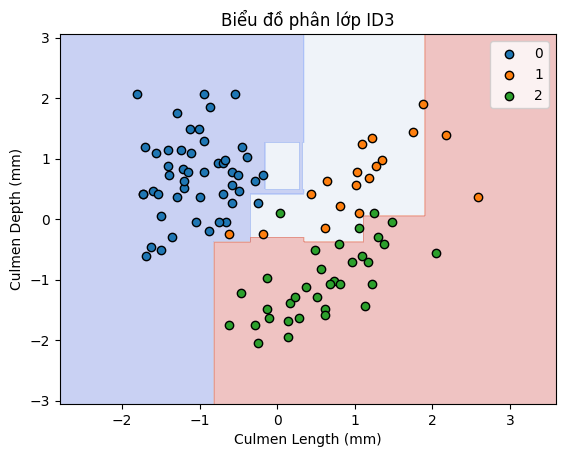

In [203]:
# Vẽ biểu đồ phân lớp
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Dự đoán trên lưới
Z = joblib.load('id3.pkl').predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Vẽ đường biên quyết định
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# Vẽ các điểm dữ liệu
for i, species in enumerate(np.unique(y_test)):
    mask = y_test == species
    plt.scatter(X_test[mask, 0], X_test[mask, 1], label=species, marker='o', edgecolor='k')

plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')
plt.title('Biểu đồ phân lớp ID3')
plt.legend()
plt.show()

# 5.Huấn luyện mô hình dựa trên Neural Network (MLPClassifier)


In [204]:
# Tạo mô hình MLP
mlp = MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=1000, random_state=42, )

# Huấn luyện mô hình MLP
mlp.fit(X_train, y_train)


MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=1000, random_state=42)

In [205]:
# Lưu mô hình
joblib.dump(mlp, 'mlp.pkl')



['mlp.pkl']

In [206]:
# Dự đoán trên tập kiểm tra
y_pred_mlp = joblib.load('mlp.pkl').predict(X_test)
print("Kết quả dự đoán của mô hình MLP trên tập kiểm tra:")
print("Giá trị thực tế (y_test):", y_test)
print("Kết quả dự đoán (y_pred_mlp):", y_pred_mlp)
print("Độ chính xác:", accuracy_score(y_test, y_pred_mlp))

#

Kết quả dự đoán của mô hình MLP trên tập kiểm tra:
Giá trị thực tế (y_test): 30     0
317    2
79     0
201    1
63     0
      ..
7      0
215    1
99     0
35     0
27     0
Name: species, Length: 101, dtype: int64
Kết quả dự đoán (y_pred_mlp): [0 2 0 1 0 2 2 1 1 1 0 0 2 0 2 0 0 1 0 2 0 0 2 1 0 0 2 2 2 2 1 2 0 0 2 2 1
 2 0 0 0 0 1 1 0 0 2 0 0 2 0 2 2 0 0 2 0 0 1 1 1 2 2 0 0 2 0 2 0 2 0 0 1 2
 2 1 0 0 0 2 0 0 0 0 2 2 0 2 1 1 2 2 0 0 0 0 0 1 0 0 0]
Độ chính xác: 0.9603960396039604


In [207]:
# Đánh giá mô hình MLP
print("MLP Classification Report:")
print(classification_report(y_test, y_pred_mlp))

MLP Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        49
           1       0.89      0.89      0.89        18
           2       0.97      0.94      0.96        34

    accuracy                           0.96       101
   macro avg       0.95      0.94      0.94       101
weighted avg       0.96      0.96      0.96       101



In [208]:
print("Ma trận nhầm lẫn mlp:", confusion_matrix(y_test, y_pred_mlp))

Ma trận nhầm lẫn mlp: [[49  0  0]
 [ 1 16  1]
 [ 0  2 32]]


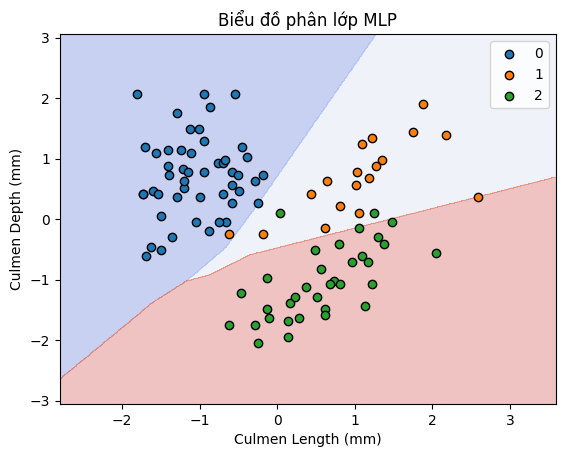

In [209]:
# Vẽ biểu đồ phân lớp
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Dự đoán trên lưới
Z = joblib.load('mlp.pkl').predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Vẽ đường biên quyết định
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# Vẽ các điểm dữ liệu
for i, species in enumerate(np.unique(y_test)):
    mask = y_test == species
    plt.scatter(X_test[mask, 0], X_test[mask, 1], label=species, marker='o', edgecolor='k')

plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')
plt.title('Biểu đồ phân lớp MLP')
plt.legend()
plt.show()

Biểu Đồ


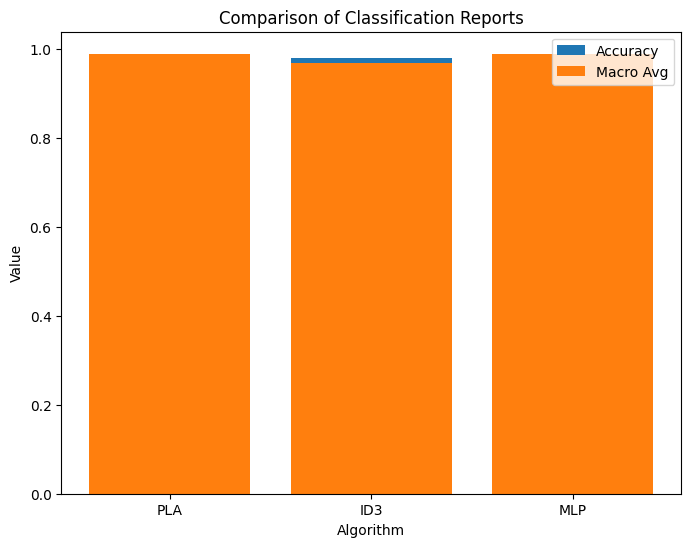

In [210]:
# Data for the plot
algorithms = ['PLA', 'ID3', 'MLP']
accuracies = [0.99, 0.98, 0.99]
macro_avgs = [0.99, 0.97, 0.99]

# Create the plot
plt.figure(figsize=(8, 6))
plt.bar(algorithms, accuracies, label='Accuracy')
plt.bar(algorithms, macro_avgs, label='Macro Avg')
plt.xlabel('Algorithm')
plt.ylabel('Value')
plt.title('Comparison of Classification Reports')
plt.legend()
plt.show()

Ma tran nham lan

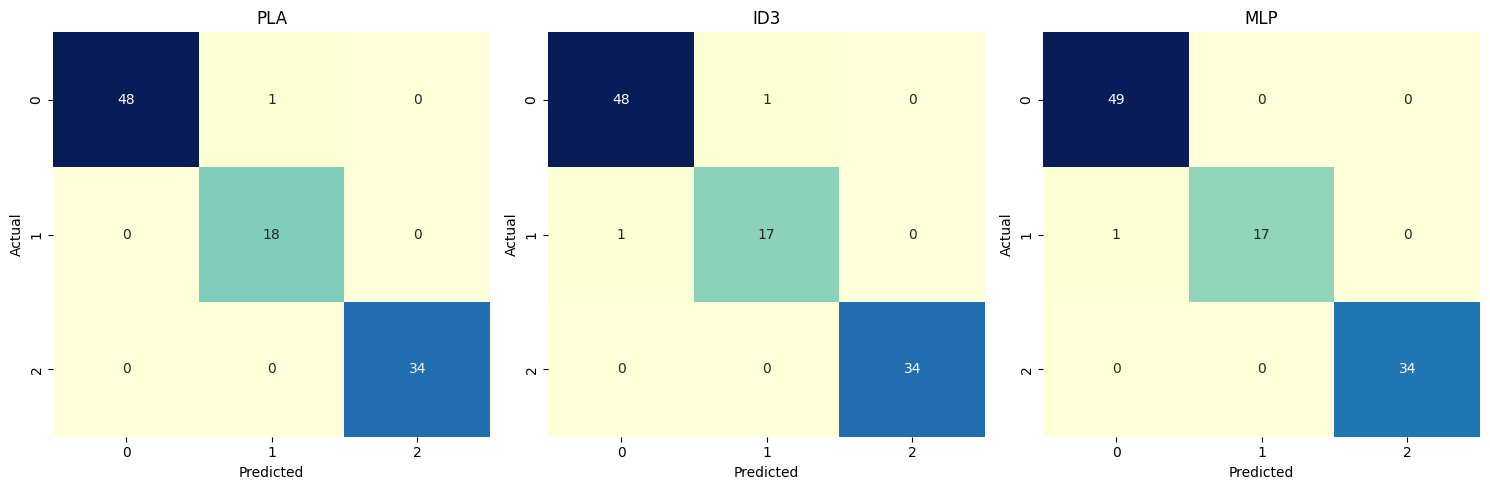

In [211]:
import seaborn as sns
# Ma trận nhầm lẫn
cm_pla = np.array([[48, 1, 0], [0, 18, 0], [0, 0, 34]]) 
cm_id3 = np.array([[48, 1, 0], [1, 17, 0], [0, 0, 34]])
cm_mlp = np.array([[49, 0, 0], [1, 17, 0], [0, 0, 34]])

# Vẽ biểu đồ ma trận nhầm lẫn
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.heatmap(cm_pla, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.title("PLA")
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 3, 2)
sns.heatmap(cm_id3, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.title("ID3")
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 3, 3)
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.title("MLP")
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

Bagging


In [212]:
from sklearn.ensemble import BaggingClassifier
# Tạo và huấn luyện mô hình Bagging với Decision Tree
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(criterion='entropy'), n_estimators=10, random_state=42)
bagging_clf.fit(X_train, y_train)
y_pred_bagging = bagging_clf.predict(X_test)
print("\nKết quả dự đoán của Bagging:")
print("Độ chính xác:", accuracy_score(y_test, y_pred_bagging))
print("Báo cáo phân loại:")
print(classification_report(y_test, y_pred_bagging))
print("Ma trận nhầm lẫn:")
print(confusion_matrix(y_test, y_pred_bagging))


Kết quả dự đoán của Bagging:
Độ chính xác: 0.9207920792079208
Báo cáo phân loại:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        49
           1       0.73      0.89      0.80        18
           2       0.97      0.85      0.91        34

    accuracy                           0.92       101
   macro avg       0.89      0.91      0.90       101
weighted avg       0.93      0.92      0.92       101

Ma trận nhầm lẫn:
[[48  1  0]
 [ 1 16  1]
 [ 0  5 29]]


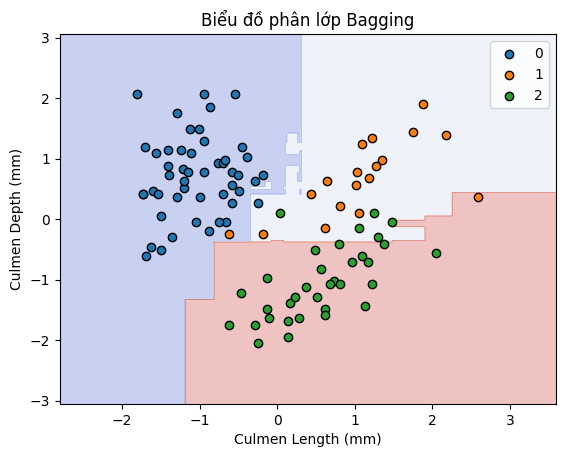

In [213]:
# Vẽ biểu đồ phân lớp
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Dự đoán trên lưới
Z = bagging_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Vẽ đường biên quyết định
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# Vẽ các điểm dữ liệu
for i, species in enumerate(np.unique(y_test)):
    mask = y_test == species
    plt.scatter(X_test[mask, 0], X_test[mask, 1], label=species, marker='o', edgecolor='k')

plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')
plt.title('Biểu đồ phân lớp Bagging')
plt.legend()
plt.show()

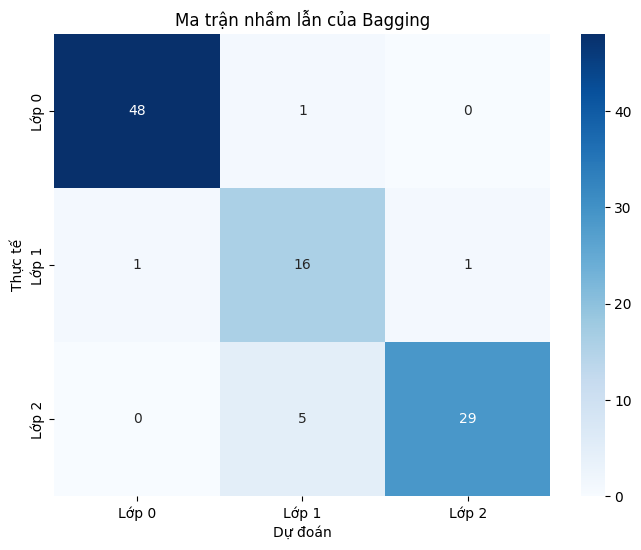

In [214]:

# Ma trận nhầm lẫn
conf_mat = np.array([[48, 1, 0], [1, 16, 1], [0, 5, 29]])

# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='d', xticklabels=['Lớp 0', 'Lớp 1', 'Lớp 2'], yticklabels=['Lớp 0', 'Lớp 1', 'Lớp 2'])
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.title('Ma trận nhầm lẫn của Bagging')
plt.show()

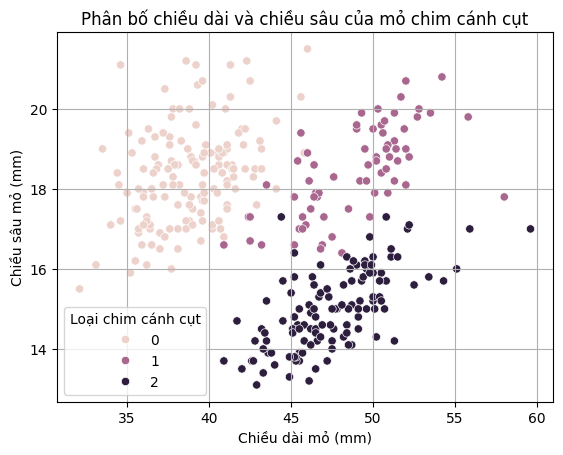

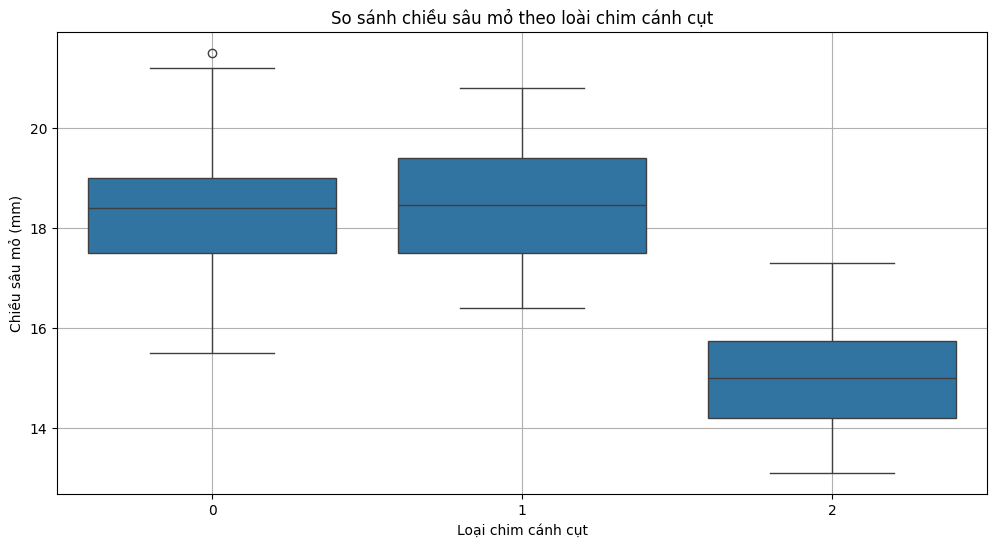

In [215]:
import seaborn as sns
# Vẽ biểu đồ phân tán
sns.scatterplot(data=data, x='culmen_length_mm', y='culmen_depth_mm', hue='species')
plt.title('Phân bố chiều dài và chiều sâu của mỏ chim cánh cụt')
plt.xlabel('Chiều dài mỏ (mm)')
plt.ylabel('Chiều sâu mỏ (mm)')
plt.legend(title='Loại chim cánh cụt')
plt.grid()
plt.show()

# Vẽ biểu đồ hộp để so sánh chiều sâu mỏ theo loài
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='species', y='culmen_depth_mm')
plt.title('So sánh chiều sâu mỏ theo loài chim cánh cụt')
plt.xlabel('Loại chim cánh cụt')
plt.ylabel('Chiều sâu mỏ (mm)')
plt.grid()
plt.show()

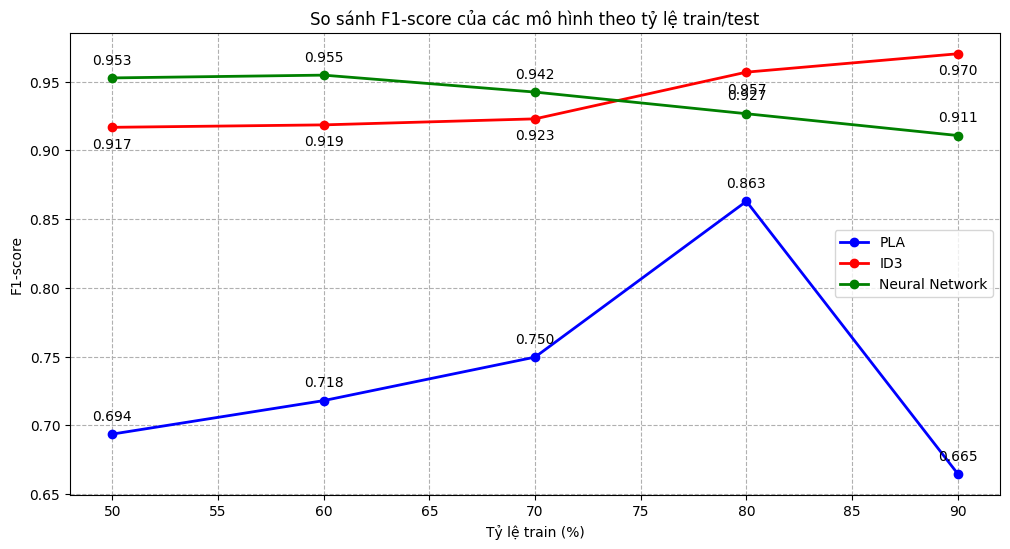

In [216]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score

# Chuẩn bị dữ liệu
X = data[['culmen_length_mm', 'culmen_depth_mm']]
y = data['species']

# Tạo các tỷ lệ train/test
train_ratios = np.array([0.5, 0.6, 0.7, 0.8, 0.9])

# Khởi tạo các mô hình
pla_model = Perceptron(random_state=42)
id3_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
nn_model = MLPClassifier(hidden_layer_sizes=(100,), random_state=42, max_iter=1000)

# Lưu kết quả F1-score
pla_f1_scores = []
id3_f1_scores = []
nn_f1_scores = []

# Train và test các mô hình với từng tỷ lệ
for ratio in train_ratios:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=ratio, random_state=42)
    
    # PLA
    pla_model.fit(X_train, y_train)
    pla_pred = pla_model.predict(X_test)
    pla_f1 = f1_score(y_test, pla_pred, average='weighted')
    pla_f1_scores.append(pla_f1)
    
    # ID3
    id3_model.fit(X_train, y_train)
    id3_pred = id3_model.predict(X_test)
    id3_f1 = f1_score(y_test, id3_pred, average='weighted')
    id3_f1_scores.append(id3_f1)
    
    # Neural Network
    nn_model.fit(X_train, y_train)
    nn_pred = nn_model.predict(X_test)
    nn_f1 = f1_score(y_test, nn_pred, average='weighted')
    nn_f1_scores.append(nn_f1)

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))

# Vẽ đường cho từng mô hình
plt.plot(train_ratios * 100, pla_f1_scores, 'b-o', label='PLA', linewidth=2)
plt.plot(train_ratios * 100, id3_f1_scores, 'r-o', label='ID3', linewidth=2)
plt.plot(train_ratios * 100, nn_f1_scores, 'g-o', label='Neural Network', linewidth=2)

# Thêm nhãn cho các điểm
for i, ratio in enumerate(train_ratios):
    plt.annotate(f'{pla_f1_scores[i]:.3f}', 
                (ratio * 100, pla_f1_scores[i]),
                textcoords="offset points",
                xytext=(0,10),
                ha='center')
    plt.annotate(f'{id3_f1_scores[i]:.3f}', 
                (ratio * 100, id3_f1_scores[i]),
                textcoords="offset points",
                xytext=(0,-15),
                ha='center')
    plt.annotate(f'{nn_f1_scores[i]:.3f}',  # sửa lỗi ở đây
                (ratio * 100, nn_f1_scores[i]),
                textcoords="offset points",
                xytext=(0,10),
                ha='center')

# Tùy chỉnh biểu đồ
plt.xlabel('Tỷ lệ train (%)')
plt.ylabel('F1-score')
plt.title('So sánh F1-score của các mô hình theo tỷ lệ train/test')
plt.grid(True, linestyle='--')
plt.legend()
plt.show()

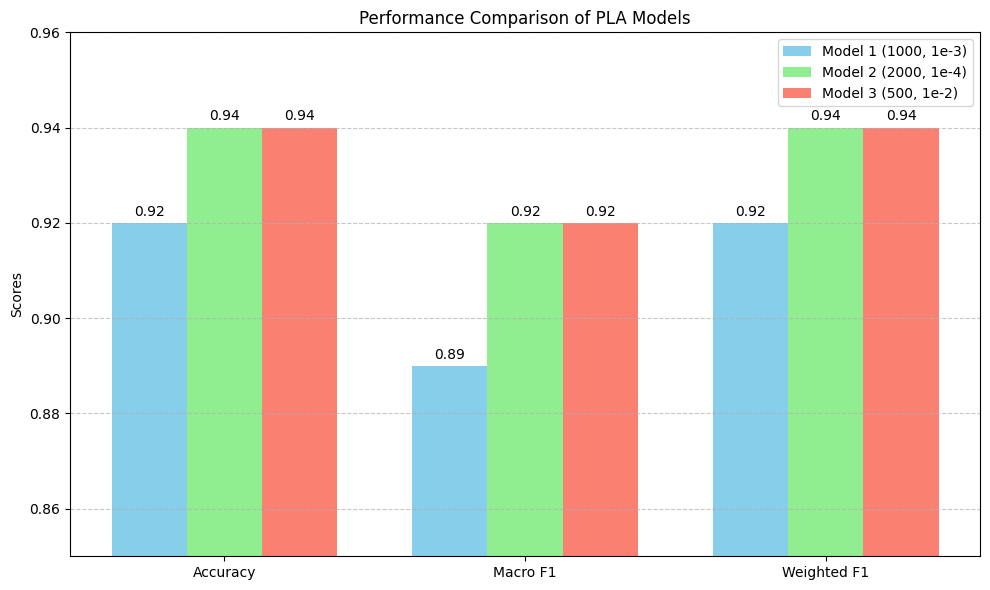

In [217]:
import matplotlib.pyplot as plt
import numpy as np

# Dữ liệu
metrics = ['Accuracy', 'Macro F1', 'Weighted F1']
model1_scores = [0.92, 0.89, 0.92]  # Model 1 (1000, 1e-3)
model2_scores = [0.94, 0.92, 0.94]  # Model 2 (2000, 1e-4)
model3_scores = [0.94, 0.92, 0.94]  # Model 3 (500, 1e-2)

x = np.arange(len(metrics))  # vị trí của các cột
width = 0.25  # độ rộng của cột

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, model1_scores, width, label='Model 1 (1000, 1e-3)', color='skyblue')
rects2 = ax.bar(x, model2_scores, width, label='Model 2 (2000, 1e-4)', color='lightgreen')
rects3 = ax.bar(x + width, model3_scores, width, label='Model 3 (500, 1e-2)', color='salmon')

# Tùy chỉnh biểu đồ
ax.set_ylabel('Scores')
ax.set_title('Performance Comparison of PLA Models')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Thêm giá trị lên đầu các cột
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 điểm offset dọc
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

# Đặt giới hạn trục y từ 0.8 đến 1.0 để thấy rõ sự khác biệt
ax.set_ylim(0.85, 0.96)

# Thêm lưới ngang để dễ đọc
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Điều chỉnh layout
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

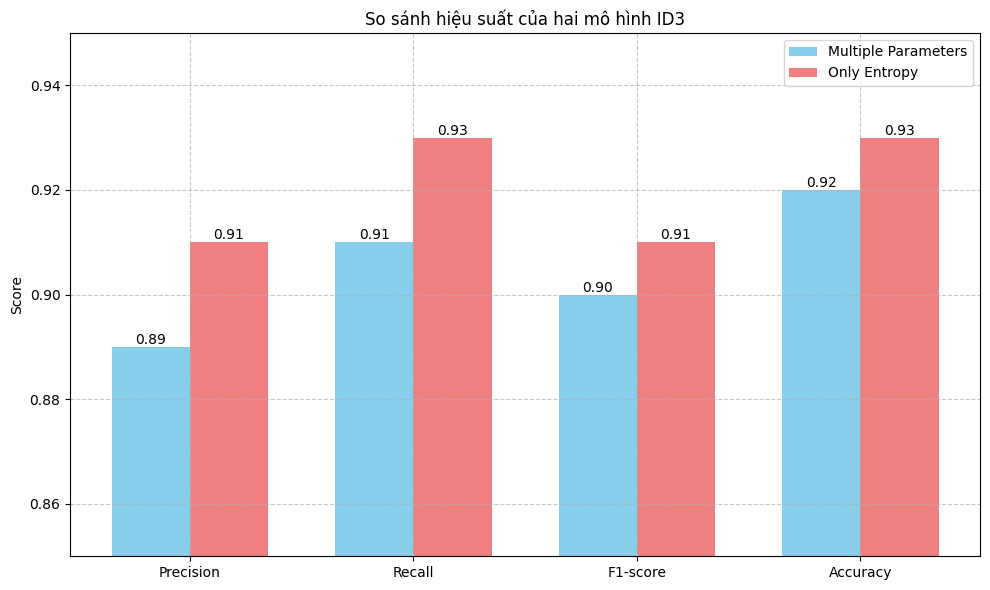

In [218]:
import matplotlib.pyplot as plt
import numpy as np

# Dữ liệu cho biểu đồ
metrics = ['Precision', 'Recall', 'F1-score', 'Accuracy']

# Dữ liệu từ hai mô hình
model1_data = [0.89, 0.91, 0.90, 0.92]  # Multiple Parameters
model2_data = [0.91, 0.93, 0.91, 0.93]  # Only Entropy

# Thiết lập vị trí các cột
x = np.arange(len(metrics))
width = 0.35

# Tạo biểu đồ
plt.figure(figsize=(10, 6))
bars1 = plt.bar(x - width/2, model1_data, width, label='Multiple Parameters', color='skyblue')
bars2 = plt.bar(x + width/2, model2_data, width, label='Only Entropy', color='lightcoral')

# Chỉnh sửa biểu đồ
plt.ylabel('Score')
plt.title('So sánh hiệu suất của hai mô hình ID3')
plt.xticks(x, metrics)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Thêm giá trị lên đầu mỗi cột
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}',
                ha='center', va='bottom')

autolabel(bars1)
autolabel(bars2)

# Điều chỉnh giới hạn trục y để nhìn rõ sự khác biệt
plt.ylim(0.85, 0.95)

plt.tight_layout()
plt.show()

c:\Users\Quang-test\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Quang-test\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


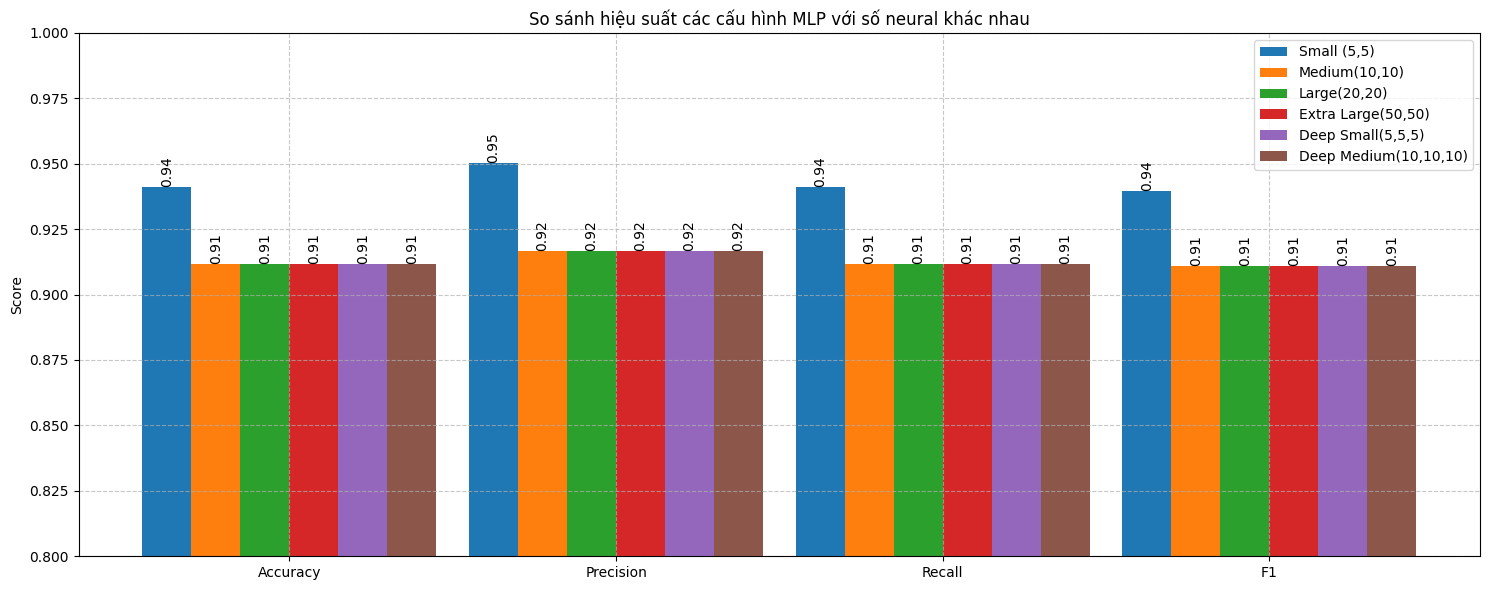


Kết quả chi tiết:

Small (5,5):
Accuracy: 0.9412
Precision: 0.9502
Recall: 0.9412
F1: 0.9394

Medium(10,10):
Accuracy: 0.9118
Precision: 0.9166
Recall: 0.9118
F1: 0.9108

Large(20,20):
Accuracy: 0.9118
Precision: 0.9166
Recall: 0.9118
F1: 0.9108

Extra Large(50,50):
Accuracy: 0.9118
Precision: 0.9166
Recall: 0.9118
F1: 0.9108

Deep Small(5,5,5):
Accuracy: 0.9118
Precision: 0.9166
Recall: 0.9118
F1: 0.9108

Deep Medium(10,10,10):
Accuracy: 0.9118
Precision: 0.9166
Recall: 0.9118
F1: 0.9108


In [219]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Tạo các cấu hình với số neural khác nhau
configurations = {
    'Small (5,5)': (5, 5),
    'Medium(10,10)': (10, 10),
    'Large(20,20)': (20, 20),
    'Extra Large(50,50)': (50, 50),
    'Deep Small(5,5,5)': (5, 5, 5),
    'Deep Medium(10,10,10)': (10, 10, 10),
}

# Dictionary để lưu kết quả
results = {}

# Huấn luyện và đánh giá từng mô hình
for name, hidden_layer_sizes in configurations.items():
    mlp = MLPClassifier(
        hidden_layer_sizes=hidden_layer_sizes,
        max_iter=1000,
        random_state=42
    )
    
    # Huấn luyện mô hình
    mlp.fit(X_train, y_train)
    
    # Dự đoán
    y_pred = mlp.predict(X_test)
    
    # Tính các metrics
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1': f1_score(y_test, y_pred, average='weighted')
    }

# Vẽ biểu đồ so sánh
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
x = np.arange(len(metrics))
width = 0.15  # Độ rộng của mỗi cột

plt.figure(figsize=(15, 6))

# Vẽ cột cho từng cấu hình
for i, (name, scores) in enumerate(results.items()):
    values = [scores[metric] for metric in metrics]
    plt.bar(x + i*width, values, width, label=name)

# Chỉnh sửa biểu đồ
plt.ylabel('Score')
plt.title('So sánh hiệu suất các cấu hình MLP với số neural khác nhau')
plt.xticks(x + width * 2.5, metrics)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Thêm giá trị lên đầu mỗi cột
for i, (name, scores) in enumerate(results.items()):
    for j, metric in enumerate(metrics):
        plt.text(j + i*width, scores[metric],
                f'{scores[metric]:.2f}',
                ha='center', va='bottom',
                rotation=90)

plt.ylim(0.8, 1.0)
plt.tight_layout()
plt.show()

# In kết quả chi tiết
print("\nKết quả chi tiết:")
for name, scores in results.items():
    print(f"\n{name}:")
    for metric, value in scores.items():
        print(f"{metric}: {value:.4f}")

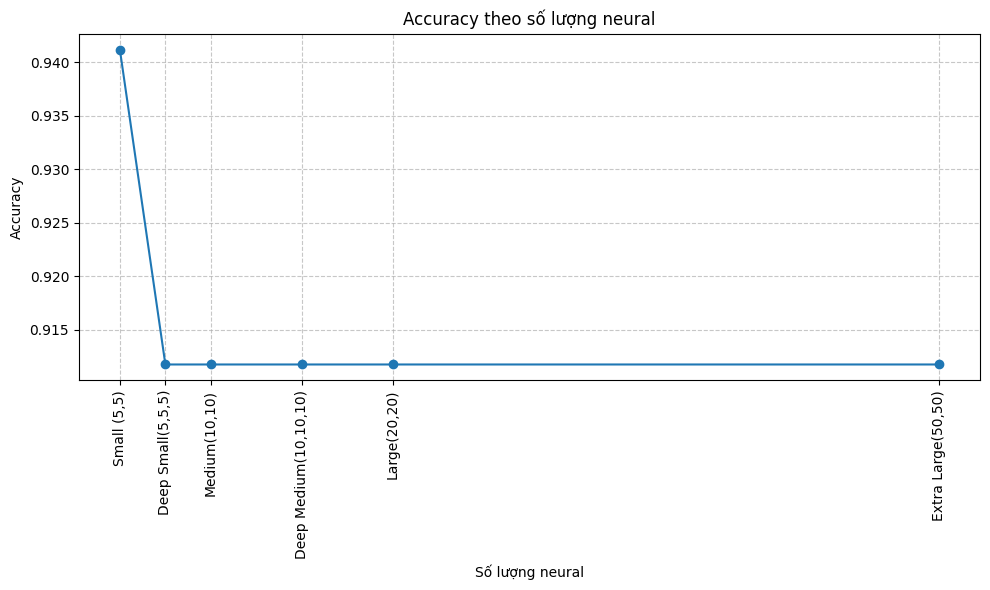

In [220]:
# Vẽ biểu đồ đường cho accuracy theo số lượng neural
plt.figure(figsize=(10, 6))

# Lấy số lượng neural tổng cộng cho mỗi cấu hình
total_neurons = {
    'Small (5,5)': 10,
    'Medium(10,10)': 20,
    'Large(20,20)': 40,
    'Extra Large(50,50)': 100, # 50*2
    'Deep Small(5,5,5)': 15,  # 5*3
    'Deep Medium(10,10,10)': 30,  # 10*3
}

# Sắp x��p theo số lượng neural tăng dần
sorted_names = sorted(total_neurons, key=total_neurons.get)

# Vẽ biểu đồ đường
plt.plot([total_neurons[name] for name in sorted_names],
         [results[name]['Accuracy'] for name in sorted_names],
         marker='o')

# Chỉnh sửa biểu đồ
plt.xlabel('Số lượng neural')
plt.ylabel('Accuracy')
plt.title('Accuracy theo số lượng neural')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks([total_neurons[name] for name in sorted_names],
           [name for name in sorted_names], rotation=90)
plt.tight_layout()
plt.show()

c:\Users\Quang-test\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Quang-test\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Quang-test\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



ReLU:
Accuracy: 0.9412
Precision: 0.9502
Recall: 0.9412
F1: 0.9394

Sigmoid:
Accuracy: 0.9118
Precision: 0.9166
Recall: 0.9118
F1: 0.9108

Tanh:
Accuracy: 0.4412
Precision: 0.1946
Recall: 0.4412
F1: 0.2701

Identity:
Accuracy: 0.9118
Precision: 0.9166
Recall: 0.9118
F1: 0.9108

So sánh tổng quan:
             ReLU  Sigmoid    Tanh  Identity
Accuracy   0.9412   0.9118  0.4412    0.9118
Precision  0.9502   0.9166  0.1946    0.9166
Recall     0.9412   0.9118  0.4412    0.9118
F1         0.9394   0.9108  0.2701    0.9108


c:\Users\Quang-test\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


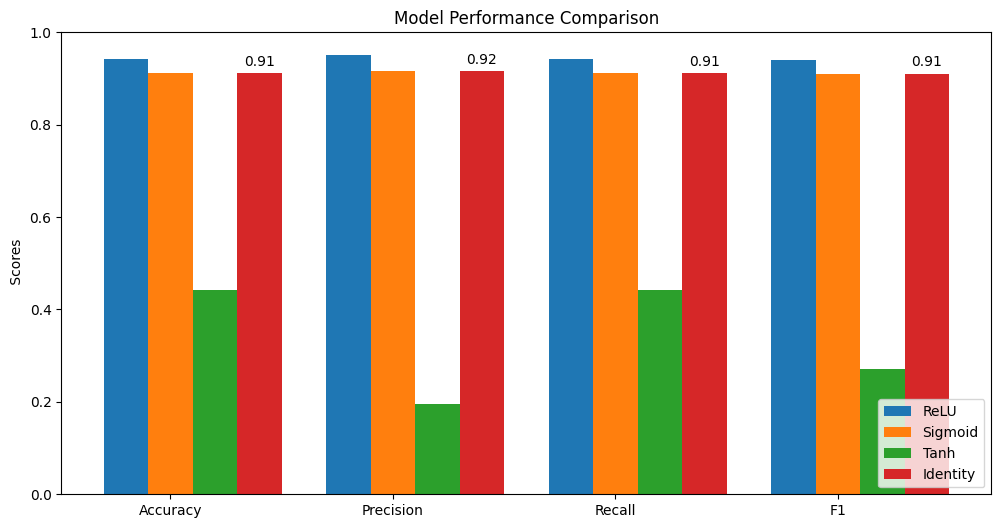

In [221]:
activation_configs = {
    'ReLU': MLPClassifier(hidden_layer_sizes=(5,5), activation='relu', 
                         max_iter=1000, random_state=42),
    'Sigmoid': MLPClassifier(hidden_layer_sizes=(5,5), activation='logistic', 
                            max_iter=1000, random_state=42),
    'Tanh': MLPClassifier(hidden_layer_sizes=(5,5), activation='tanh', 
                         max_iter=1000, random_state=42),
    'Identity': MLPClassifier(hidden_layer_sizes=(5,5), activation='identity', 
                            max_iter=1000, random_state=42)
                    }
# Dictionary lưu kết quả
results = {}

# Train và đánh giá từng mô hình
for name, model in activation_configs.items():
    # Train model
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    
    # Tính các metrics
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1': f1_score(y_test, y_pred, average='weighted')
    }

# In kết quả chi tiết
for name, metrics in results.items():
    print(f"\n{name}:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")

# Tạo DataFrame để so sánh dễ dàng
df_results = pd.DataFrame(results).round(4)
print("\nSo sánh tổng quan:")
print(df_results)

# Visualize results
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
x = np.arange(len(metrics))
width = 0.2
multiplier = 0

fig, ax = plt.subplots(figsize=(12, 6))

for attribute, measurement in results.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, [measurement[metric] for metric in metrics], 
                   width, label=attribute)
    multiplier += 1

ax.set_ylabel(' Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x + width, metrics)
ax.legend(loc='lower right')
ax.set_ylim(0, 1)

# Add value labels on top of each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects)

plt.show()